#### Libraries

In [29]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2


#### Data Preparation

In [ ]:
# Define paths
base_dir = 'data'
happy_dir = os.path.join(base_dir, 'Happy')
sad_dir = os.path.join(base_dir, 'Sad')
angry_dir = os.path.join(base_dir, 'Angry')

# Collect image paths and labels
image_paths = []
labels = []

# Load Happy images
for img_file in os.listdir(happy_dir):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        image_paths.append(os.path.join(happy_dir, img_file))
        labels.append(0)  # 0 for Happy

# Load Sad images
for img_file in os.listdir(sad_dir):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        image_paths.append(os.path.join(sad_dir, img_file))
        labels.append(1)  # 1 for Sad

# Load Angry images
for img_file in os.listdir(angry_dir):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        image_paths.append(os.path.join(angry_dir, img_file))
        labels.append(2)  # 2 for Angry

# Convert labels to categorical (one-hot encoding)
labels = to_categorical(labels, num_classes=3)

# Define image size (resize for consistency)
IMG_SIZE = 128
data = []

for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Couldn't read image {img_path}")
        continue
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize images
    img = img / 255.0  # Normalize pixel values (0 to 1)
    data.append(img)

# Convert lists to NumPy arrays
data = np.array(data)

# Ensure labels match the length of data
labels = labels[:len(data)]

# Split dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")


Train shape: (211, 128, 128, 3), (211, 3)
Validation shape: (53, 128, 128, 3), (53, 3)


#### CNN Model Training

In [ ]:

def create_improved_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),  # Added more filters
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),  # Increased neurons
        Dropout(0.5),  # Dropout to reduce overfitting
        Dense(3, activation='softmax')  
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



1. Train CNN Without Augmentation

In [24]:
# Create the model
model = create_improved_cnn()

# Train the model
history_original = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

C:\Users\kiplimo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.3277 - loss: 1.4856 - val_accuracy: 0.3585 - val_loss: 1.0967
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.3514 - loss: 1.0867 - val_accuracy: 0.3396 - val_loss: 1.0933
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.3989 - loss: 1.0518 - val_accuracy: 0.3396 - val_loss: 1.0547
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.4361 - loss: 1.0035 - val_accuracy: 0.3585 - val_loss: 0.9990
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.5479 - loss: 0.9509 - val_accuracy: 0.5283 - val_loss: 0.9976
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.6631 - loss: 0.9007 - val_accuracy: 0.6226 - val_loss: 0.9236
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.7044 - loss: 0.7806 - val_accuracy: 0.4528 - val_loss: 0.9815
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.7191 - loss: 0.6762 - val_accuracy: 0.6038 - val_loss:

2. Train the CNN with Augmentation

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,        
    width_shift_range=0.1,    
    height_shift_range=0.1,
    shear_range=0.1,          
    zoom_range=0.1,           
    horizontal_flip=True,
    fill_mode='nearest'
)


# Train with augmentation
augmented_model = create_improved_cnn()
history_augmented = augmented_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10)


C:\Users\kiplimo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step - accuracy: 0.3919 - loss: 1.5582 - val_accuracy: 0.3396 - val_loss: 1.0951
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.4078 - loss: 1.0693 - val_accuracy: 0.3396 - val_loss: 1.0805
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.4082 - loss: 1.0778 - val_accuracy: 0.3396 - val_loss: 1.0435
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.4357 - loss: 1.0686 - val_accuracy: 0.4717 - val_loss: 0.9889
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.4535 - loss: 1.0070 - val_accuracy: 0.5094 - val_loss: 0.8959
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.4515 - loss: 1.0285 - val_accuracy: 0.5660 - val_loss: 1.0046
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - accuracy: 0.5591 - loss: 1.0205 - val_accuracy: 0.4528 - val_loss: 0.9688
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.4859 - loss: 0.9804 - val_accuracy: 0.6038 - val_loss:

In [26]:
original_acc = model.evaluate(X_val, y_val, verbose=0)[1]
augmented_acc = augmented_model.evaluate(X_val, y_val, verbose=0)[1]

print(f'Original Model Accuracy: {original_acc:.2f}')
print(f'Augmented Model Accuracy: {augmented_acc:.2f}')


Original Model Accuracy: 0.51
Augmented Model Accuracy: 0.57


##### Original Model Accuracy (0.51 = 51%)

- The original CNN, trained without augmentation, correctly classifies 51% of validation images.
- This suggests overfitting, as the model likely performs well on training data but generalizes poorly

##### Augmented Model Accuracy (0.57 = 57%)

- The augmented model performs better, achieving 57% accuracy on the validation set.
- Improvement of +6% suggests data augmentation helped by introducing more diverse training samples, reducing overfitting.

#### Graph Interpretation

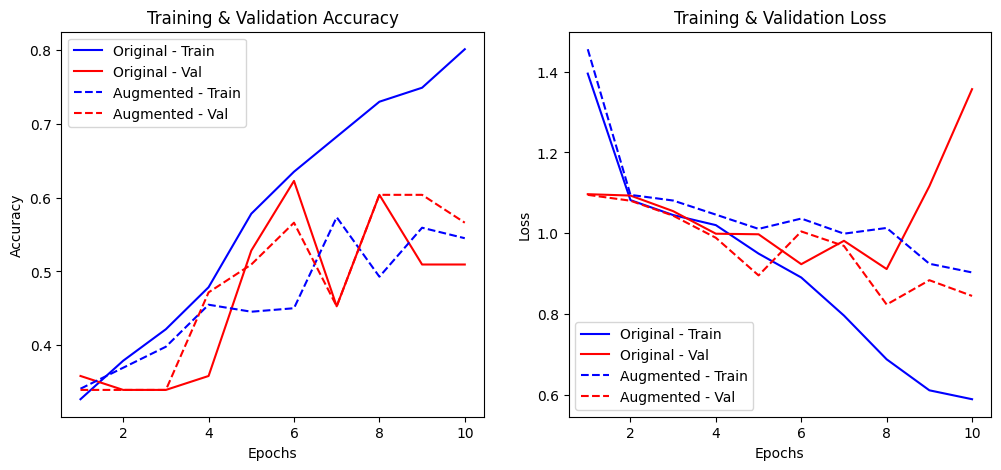

In [ ]:
# Extract values for plotting
epochs = range(1, 11)  # 10 epochs

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_original.history['accuracy'], 'b', label='Original - Train')
plt.plot(epochs, history_original.history['val_accuracy'], 'r', label='Original - Val')
plt.plot(epochs, history_augmented.history['accuracy'], 'b--', label='Augmented - Train')
plt.plot(epochs, history_augmented.history['val_accuracy'], 'r--', label='Augmented - Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_original.history['loss'], 'b', label='Original - Train')
plt.plot(epochs, history_original.history['val_loss'], 'r', label='Original - Val')
plt.plot(epochs, history_augmented.history['loss'], 'b--', label='Augmented - Train')
plt.plot(epochs, history_augmented.history['val_loss'], 'r--', label='Augmented - Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()
